In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re
import time
from scripts import *
import scipy.linalg as la

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split as tts, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve

from plotMatriz import plotMatriz
from sklearn.decomposition import TruncatedSVD

from sklearn.cluster import MiniBatchKMeans
import pandas as pd

In [98]:
stemmed_data_path = 'Dados/stemsnowball.p'
dados_path = 'Dados/imdbFull.p'
final_tfidf_bin = 'tfidf/tfidf_binario.p'

In [99]:
D = pickle.load(open(dados_path, 'rb'))
Docs = D['data']
Docs = [doc.replace('<br />', ' ') for doc in Docs]
Docs = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+', ' ', doc) for doc in Docs]
y = D['target']

In [100]:
#divisão dos dados
Docs1, Docs2, y1, y2     = tts(Docs, y, test_size=len(Docs)-5000, stratify=y,random_state=42)
Docs1t, Docs1v, y1t, y1v = tts(Docs1, y1, test_size=len(Docs1)-3500, stratify=y1,random_state=42) 

In [101]:
tfidf = TfidfVectorizer(min_df = 5, max_df = 0.95, max_features = 8000, stop_words = 'english').fit(Docs1)

X1t = tfidf.transform(Docs1t)
X1v  = tfidf.transform(Docs1v)

In [102]:
clustering_path = 'Resultados/clustering.p'

In [103]:
sse = []
ks = np.arange(20,501,20)

for k in ks:
    sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048).fit(X1v).inertia_)

pickle.dump({'sse': sse}, open(clustering_path, 'wb'))

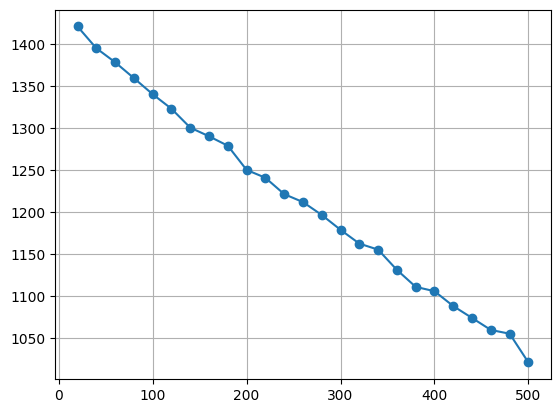

In [104]:
sse = pickle.load(open(clustering_path, 'rb'))['sse']

plt.plot(np.arange(20, 501, 20),sse, marker='o')
plt.grid(True)

In [135]:
clusters = MiniBatchKMeans(n_clusters=400, init_size=1024, batch_size=2048,random_state=510).fit_predict(X1v)
tfidf  = TfidfVectorizer(min_df = 5, max_df = 0.95, max_features = 8000, stop_words = 'english').fit(Docs1).get_feature_names_out()
n_palavras = 10

In [136]:
df = pd.DataFrame(X1v.todense()).groupby(clusters).mean()

for i,l in df.iterrows():
    print('Cluster ', i,' => ' , ','.join([tfidf[t] for t in np.argsort(l)[-n_palavras:]]))

Cluster  0  =>  family,played,santa,incidents,versatile,jolly,dickens,thumb,wonderful,man
Cluster  1  =>  nudity,quit,blob,films,creepy,film,fan,prison,ghost,horror
Cluster  2  =>  mccarthy,local,movie,surprised,film,rich,cable,rental,video,suspense
Cluster  3  =>  finally,movies,fantasies,tracy,crew,scifi,williams,max,alien,jeff
Cluster  4  =>  dud,prints,furious,second,curtiz,taking,fast,powell,dubious,vance
Cluster  5  =>  human,country,date,emotion,psycho,aware,traumatized,hartley,ray,rose
Cluster  6  =>  watching,dress,teaching,second,beautiful,began,films,thomas,colour,edison
Cluster  7  =>  new,quality,character,look,films,empire,lucas,robocop,emperor,film
Cluster  8  =>  thirty,dinner,cage,print,hammer,minutes,probably,nicholas,cocktail,syndrome
Cluster  9  =>  coma,convention,thug,attending,induced,comatose,nice,business,trying,tony
Cluster  10  =>  room,fantasy,wwi,lover,child,kitty,soldier,chris,jenny,margaret
Cluster  12  =>  heist,downhill,terry,money,robbed,damon,movie,ze